In [1]:
import os  # For operating system related operations
import imagehash  # For computing image hashes
import glob  # For file pattern matching
import gdown
from pathlib import Path
import numpy as np  # For numerical operations
import tensorflow as tf  # For deep learning framework
from tensorflow import keras  # For high-level neural networks API
import matplotlib.pyplot as plt  # For plotting graphs and images
from keras.models import *  # For creating Keras models
from keras.layers import *  # For different types of layers
from keras import backend as K  # For accessing Keras backend operations
from keras.utils.vis_utils import plot_model  # For visualizing model architecture
from keras.optimizers import Adam  # For optimizer
from PIL import Image  # For image operations
import joblib
from sklearn.metrics.pairwise import cosine_similarity  # For computing cosine similarity
from keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from keras.callbacks import ModelCheckpoint, EarlyStopping # For model checkpoint and early stopping the train
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
url = 'https://drive.google.com/u/0/uc?id=1DyN5mk6oMqULPQ4z52KldztKHMl_ukW6&export=download&confirm=t&uuid=d2595c84-06e2-416e-ba3d-734be21e2664&at=AKKF8vwWd5qmBZcNqmu1E9Un_Xsu:1684169207246'
output = f'{Path().absolute()}/data.zip'
gdown.download(url, output, quiet = False)

Downloading...
From: https://drive.google.com/u/0/uc?id=1DyN5mk6oMqULPQ4z52KldztKHMl_ukW6&export=download&confirm=t&uuid=d2595c84-06e2-416e-ba3d-734be21e2664&at=AKKF8vwWd5qmBZcNqmu1E9Un_Xsu:1684169207246
To: C:\Users\Admin\Downloads\data.zip
100%|█████████████████████████████████████████████████████████████████████████████| 74.6M/74.6M [00:04<00:00, 17.5MB/s]


'C:\\Users\\Admin\\Downloads/data.zip'

In [3]:
import zipfile
with zipfile.ZipFile("data.zip", 'r') as zip_ref:
    zip_ref.extractall()

While techniques such as noise removal or denoising can be useful in certain scenarios, their primary focus is on removing unwanted noise or artifacts that can degrade the quality or visibility of an image. In the case of visually similar image model, the goal is to identify and compare images based on their visual content, and duplicates are not considered informative for this purpose. In the context of visually similar image systems, removing duplicate images can be a valuable preprocessing step for several reasons:

1. `Reducing Redundancy`: Duplicate images provide redundant information that can unnecessarily increase the computational burden during feature extraction, comparison, and retrieval processes. By removing duplicates, we can streamline these operations and focus on unique images, leading to more efficient and faster image retrieval.

2. `Preventing Biased Results`: When duplicate images are present in the dataset, they can bias the similarity or ranking results. Duplicate images would receive the highest similarity scores or ranks, overshadowing other visually similar but non-duplicate images. Removing duplicates helps ensure fair and unbiased results by considering each visually distinct image independently.

3. `Improving Diversity`: By eliminating duplicates, we encourage the inclusion of diverse and unique images in the visually similar image system. This can lead to a richer and more representative dataset, capturing a broader range of visual characteristics and variations within the target image classes.

4. `Reducing Overfitting`: Including duplicate images in the training process can potentially lead to overfitting, where the model becomes too specialized in recognizing and matching specific instances rather than capturing general visual patterns. Removing duplicates can help mitigate overfitting by promoting a more balanced and diverse training set.

In [4]:
hashes = {}
duplicated = []   

# Define a function to compute the hash of an image file
def compute_hash(filepath):
    with Image.open(filepath) as img:
        return str(imagehash.phash(img))
    
# Define a function to find and remove duplicated images
def check_duplicates(rootdir):
    rootdir = glob.glob(rootdir)
    duplicated = []
    max_length = 0
    for folder in rootdir:
        print()
        print(folder)
        for image_dir in glob.glob(folder+'/*.jpg'):
            # Compute the hash of the image file
            file_hash = compute_hash(image_dir)
            # Check if this hash has already been seen
            file=os.path.basename(image_dir).split('/')[-1]
            if file_hash in hashes:
                # if the image hash exists already, save the collision filenames
                dupe_idx = hashes[file_hash]
                duplicated.append((dupe_idx, image_dir))
            else:
                # This file is not a duplicate, so remember its hash
                hashes[file_hash] = image_dir
        print(r'Duplicated image in ',folder,' :',len(duplicated)-max_length)
        max_length=len(duplicated)

# Define a function to find and remove duplicated images
def remove_duplicates(rootdir):
    rootdir = glob.glob(rootdir)
    print(hashes)
    for folder in rootdir:
        print()
        print(folder)
        for image_dir in glob.glob(folder+'/*.jpg'):
            # Compute the hash of the image file
            file_hash = compute_hash(image_dir)
            # Check if this hash has already been seen
            file=os.path.basename(image_dir).split('/')[-1]
            if image_dir not in hashes.values():
                print(file_hash)
                print(image_dir)
                os.remove(image_dir)
                print(f'Removed duplicate file: {file}')

In [5]:
check_duplicates('data/Flowers/*')


data/Flowers\Babi
Duplicated image in  data/Flowers\Babi  : 41

data/Flowers\Calimerio
Duplicated image in  data/Flowers\Calimerio  : 41

data/Flowers\Chrysanthemum
Duplicated image in  data/Flowers\Chrysanthemum  : 25

data/Flowers\Hydrangeas
Duplicated image in  data/Flowers\Hydrangeas  : 18

data/Flowers\Lisianthus
Duplicated image in  data/Flowers\Lisianthus  : 132

data/Flowers\Pingpong
Duplicated image in  data/Flowers\Pingpong  : 20

data/Flowers\Rosy
Duplicated image in  data/Flowers\Rosy  : 19

data/Flowers\Tana
Duplicated image in  data/Flowers\Tana  : 135


In [6]:
remove_duplicates('data/Flowers/*')

{'c7174a592f613734': 'data/Flowers\\Babi\\babi_1.jpg', 'c89f2c643c6a97b1': 'data/Flowers\\Babi\\babi_10.jpg', 'd0ef5b06297c1927': 'data/Flowers\\Babi\\babi_100.jpg', 'b9acd27987d3a031': 'data/Flowers\\Babi\\babi_101.jpg', '80bb625f312d3f91': 'data/Flowers\\Babi\\babi_102.jpg', 'a7ddd024cacb8734': 'data/Flowers\\Babi\\babi_103.jpg', '81285a1579fe36f1': 'data/Flowers\\Babi\\babi_104.jpg', '9677385e2b41af60': 'data/Flowers\\Babi\\babi_105.jpg', 'b234162dbdd6c652': 'data/Flowers\\Babi\\babi_106.jpg', '88b22f0f733d8e70': 'data/Flowers\\Babi\\babi_107.jpg', 'b0ca6f2d487665c9': 'data/Flowers\\Babi\\babi_108.jpg', 'd6861e5a61948fb3': 'data/Flowers\\Babi\\babi_109.jpg', 'add284d9169c698f': 'data/Flowers\\Babi\\babi_11.jpg', 'b699075a3a6a71f0': 'data/Flowers\\Babi\\babi_110.jpg', '95830f4a64f8e59b': 'data/Flowers\\Babi\\babi_111.jpg', 'ec31c5c19b3e294b': 'data/Flowers\\Babi\\babi_112.jpg', 'bad78dd269852a52': 'data/Flowers\\Babi\\babi_113.jpg', '90c7590f6e792c0f': 'data/Flowers\\Babi\\babi_114.j

e294a5d66b946378
data/Flowers\Babi\babi_298.jpg
Removed duplicate file: babi_298.jpg
a5ded8231a69a13d
data/Flowers\Babi\babi_300.jpg
Removed duplicate file: babi_300.jpg
fcc3487c6b80703f
data/Flowers\Babi\babi_307.jpg
Removed duplicate file: babi_307.jpg
afc8d413ce03e4f8
data/Flowers\Babi\babi_311.jpg
Removed duplicate file: babi_311.jpg
a7cd4b9718363ad0
data/Flowers\Babi\babi_418.jpg
Removed duplicate file: babi_418.jpg
92452a7b6cb36596
data/Flowers\Babi\babi_423.jpg
Removed duplicate file: babi_423.jpg
d0ed3a483f31b4c9
data/Flowers\Babi\babi_426.jpg
Removed duplicate file: babi_426.jpg
c69af3a9a4a91d51
data/Flowers\Babi\babi_450.jpg
Removed duplicate file: babi_450.jpg
bec9c4314f9a606b
data/Flowers\Babi\babi_476.jpg
Removed duplicate file: babi_476.jpg
e9914896a3b5d68e
data/Flowers\Babi\babi_490.jpg
Removed duplicate file: babi_490.jpg
93de2c38aa23b29e
data/Flowers\Babi\babi_495.jpg
Removed duplicate file: babi_495.jpg
e6db996643dd8046
data/Flowers\Babi\babi_528.jpg
Removed duplicate

d483afc1821e7fa8
data/Flowers\Chrysanthemum\chrysanthemum_46.jpg
Removed duplicate file: chrysanthemum_46.jpg
9be4c9234c933c9b
data/Flowers\Chrysanthemum\chrysanthemum_534.jpg
Removed duplicate file: chrysanthemum_534.jpg
e59ae12ea6c18e3c
data/Flowers\Chrysanthemum\chrysanthemum_541.jpg
Removed duplicate file: chrysanthemum_541.jpg
fbb3c0c0918ee50f
data/Flowers\Chrysanthemum\chrysanthemum_550.jpg
Removed duplicate file: chrysanthemum_550.jpg
e8a397dc00cdf718
data/Flowers\Chrysanthemum\chrysanthemum_559.jpg
Removed duplicate file: chrysanthemum_559.jpg
ea16606ae3b4ccba
data/Flowers\Chrysanthemum\chrysanthemum_583.jpg
Removed duplicate file: chrysanthemum_583.jpg
a5cb956629679a64
data/Flowers\Chrysanthemum\chrysanthemum_669.jpg
Removed duplicate file: chrysanthemum_669.jpg
ea943ec6e11e86c9
data/Flowers\Chrysanthemum\chrysanthemum_71.jpg
Removed duplicate file: chrysanthemum_71.jpg
841b7f2e59340cf3
data/Flowers\Chrysanthemum\chrysanthemum_96.jpg
Removed duplicate file: chrysanthemum_96.jp

e4999a369bcd9330
data/Flowers\Lisianthus\lisianthus_75.jpg
Removed duplicate file: lisianthus_75.jpg
b50f727a3ec2028f
data/Flowers\Lisianthus\lisianthus_752.jpg
Removed duplicate file: lisianthus_752.jpg
85707a6f244f25b3
data/Flowers\Lisianthus\lisianthus_771.jpg
Removed duplicate file: lisianthus_771.jpg
e392a15e79ce8ec0
data/Flowers\Lisianthus\lisianthus_772.jpg
Removed duplicate file: lisianthus_772.jpg
d5f66a31c442836f
data/Flowers\Lisianthus\lisianthus_777.jpg
Removed duplicate file: lisianthus_777.jpg
e2998dc6386c9b66
data/Flowers\Lisianthus\lisianthus_79.jpg
Removed duplicate file: lisianthus_79.jpg
eda29cf721c8a619
data/Flowers\Lisianthus\lisianthus_8.jpg
Removed duplicate file: lisianthus_8.jpg
bfd1d0a41c98e62d
data/Flowers\Lisianthus\lisianthus_80.jpg
Removed duplicate file: lisianthus_80.jpg
bdd6e09d061cd263
data/Flowers\Lisianthus\lisianthus_812.jpg
Removed duplicate file: lisianthus_812.jpg
f8c7912ecab08ecc
data/Flowers\Lisianthus\lisianthus_816.jpg
Removed duplicate file:

e4991e0cbaa68d97
data/Flowers\Tana\tana_215.jpg
Removed duplicate file: tana_215.jpg
94a735be5e54e034
data/Flowers\Tana\tana_216.jpg
Removed duplicate file: tana_216.jpg
d694e44e1a636d33
data/Flowers\Tana\tana_217.jpg
Removed duplicate file: tana_217.jpg
d694e44e1a636d33
data/Flowers\Tana\tana_218.jpg
Removed duplicate file: tana_218.jpg
b983f87585a05ccd
data/Flowers\Tana\tana_219.jpg
Removed duplicate file: tana_219.jpg
f6c64b6a8727b80c
data/Flowers\Tana\tana_220.jpg
Removed duplicate file: tana_220.jpg
e4991e0cbaa68d97
data/Flowers\Tana\tana_221.jpg
Removed duplicate file: tana_221.jpg
e4991e0cbaa68d97
data/Flowers\Tana\tana_222.jpg
Removed duplicate file: tana_222.jpg
c926b89b6658bcb4
data/Flowers\Tana\tana_226.jpg
Removed duplicate file: tana_226.jpg
c926b89b6658bcb4
data/Flowers\Tana\tana_227.jpg
Removed duplicate file: tana_227.jpg
d694e44e1a636d33
data/Flowers\Tana\tana_228.jpg
Removed duplicate file: tana_228.jpg
cf936a4b264d32b4
data/Flowers\Tana\tana_24.jpg
Removed duplicate 

In [7]:
def recall_cnn(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision_cnn(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1_cnn(y_true, y_pred):
    precision = precision_cnn(y_true, y_pred)
    recall = recall_cnn(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))


These methods are functions used to calculate performance metrics, specifically recall, precision, and F1 score, for evaluating a Convolutional Neural Network (CNN) model.

- `recall_cnn` calculates the recall, which measures the ability of the model to correctly identify positive samples. It computes the ratio of true positives to the sum of true positives and false negatives. The function uses Keras backend functions to perform calculations.

- `precision_cnn` calculates the precision, which measures the model's ability to correctly classify positive predictions. It computes the ratio of true positives to the sum of true positives and false positives. Again, Keras backend functions are used for calculations.

- `f1_cnn` calculates the F1 score, which is a harmonic mean of precision and recall. It provides a balanced measure of a model's accuracy by considering both precision and recall. The function uses the previously defined precision_cnn and recall_cnn functions to calculate precision and recall, and then computes the F1 score using the formula: 2 * (precision * recall) / (precision + recall).

In [8]:
METRICS = ["accuracy", recall_cnn, precision_cnn, f1_cnn]

In [9]:
def visualize_history(history):
    #  "Plot Accuracy"
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

    # "Plot Loss"
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


In [75]:
def train_model(epochs_num, model, train_iter, valid_iter, export_dir="./export", name="default"):
    # -------------------------------------------------------------------------
    #                        Train CNN Model
    # -------------------------------------------------------------------------

    epochs = epochs_num

    history = model.fit(
        train_iter,
        steps_per_epoch=len(train_iter),
        validation_data=valid_iter,
        validation_steps=len(valid_iter),
        epochs=epochs,
        verbose=1,
    )

    return history

Within this function:
- The `epochs_num` parameter specifies the number of epochs to train the model.
- The `steps_per_epoch` to determine how many steps in each epoch

# VGG16

VGG16 is a convolutional neural network architecture known for its deep structure and strong performance in image recognition tasks. It consists of 16 layers, including 13 convolutional layers and 3 fully connected layers. VGG16's key feature is its uniformity, with convolutional layers using small 3x3 filters and max pooling layers for downsampling. This architecture allows VGG16 to learn intricate features and capture fine-grained details in images. Despite being computationally intensive, VGG16 has gained popularity due to its exceptional performance and transfer learning capabilities, making it a valuable tool in various computer vision applications, including image classification, object detection, and feature extraction.

**VGG16: Advantages and Disadvantages**

> **Advantages**
1. `Strong representation learning` : VGG16 is known for its ability to learn rich representations of images. It captures intricate details and features in the images, making it suitable for image recommendation tasks.

2. `Pretrained model availability`: VGG16 is a widely used and well-known model in the computer vision community. Pretrained weights for VGG16 are readily available, which saves time and computational resources during training.

3. `Transfer learning capabilities`: VGG16 can be used as a base model for transfer learning. By leveraging the pretrained weights, it allows for efficient training on smaller datasets and can be fine-tuned for specific image recommendation tasks.

> **Disadvantages**

1. `High computational requirements`: VGG16 has a larger number of parameters compared to some other models, making it computationally intensive to train and inference. This can be a limitation when working with limited computational resources.

2. `Lack of spatial information`: VGG16 architecture uses multiple convolutional layers followed by fully connected layers. The downsampling in these layers reduces the spatial information of the input image, which may limit its ability to capture fine-grained details for certain image recommendation tasks.

3. `Overfitting potential`: Due to the large number of parameters in VGG16, there is a higher risk of overfitting, especially when working with small datasets. Proper regularization techniques and data augmentation should be employed to mitigate this issue.

The VGG16 model architecture consists of multiple convolutional and pooling layers followed by fully connected layers. Here's a detailed explanation of each block and layer:

**VGG-16: Architecture**

> Horiontal View [8]

<p align="center" width="100%">
  <img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16.png" alt="VGG-16 Architecture"/>
</p>


> Vertical View [7]
<p align="center" width="100%">
  <img src="https://viso.ai/wp-content/uploads/2021/10/VGG-16-architecture-of-the-model.jpg" alt="VGG-16 Architecture"/>
</p>

**Implementation**
1. Block 1:

    - Conv2D layer: This layer performs a 2D convolution on the input image with 32 filters of size 3x3. It uses the ReLU activation function and preserves the input size with padding.
    - MaxPooling2D layer: This layer performs max pooling with a pool size of 2x2, reducing the spatial dimensions of the feature maps by taking the maximum value in each pooling region.

2. Block 2:

    - Conv2D layer: Another Conv2D layer with 64 filters of size 3x3, using the ReLU activation function and preserving the input size with padding.
    - MaxPooling2D layer: Another MaxPooling2D layer with a pool size of 2x2, further reducing the spatial dimensions.

3. Block 3:

    - Conv2D layer: A Conv2D layer with 128 filters of size 3x3, using the ReLU activation function and preserving the input size with padding.
    - MaxPooling2D layer: A MaxPooling2D layer with a pool size of 2x2.

4. Block 4:

    - Conv2D layer: A Conv2D layer with 256 filters of size 3x3, using the ReLU activation function and preserving the input size with padding.
    - MaxPooling2D layer: A MaxPooling2D layer with a pool size of 2x2.
    - Flatten layer: This layer flattens the 3D feature maps into a 1D vector, preparing them to be fed into the fully connected layers.
    - Fully connected layers:

        - Dense layer: A fully connected layer with 128 units and ReLU activation function.
        - Dense layer: Another fully connected layer with 64 units and ReLU activation function.
        - Dense layer: The final fully connected layer with 8 units and softmax activation function, producing the output probabilities for each class.

In [85]:
def create_vgg16_model():
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=(224, 224, 3), name='Conv1'))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool1'))

    # Block 2
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', name='Conv2'))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool2'))

    # Block 3
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu', name='Conv3'))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool3'))

    # Block 4
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', name='Conv4'))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool4'))

    # Flatten layer
    model.add(Flatten(name='Flatten'))

    # Fully connected layers
    model.add(Dense(128, activation='relu', name='FC1'))
    model.add(Dense(64, activation='relu', name='FC2'))
    model.add(Dense(8, activation='softmax', name='Output'))

    return model

In this VGG16 model:

- Block 1 consists of a convolutional layer (Conv1) followed by max pooling (Pool1). It extracts low-level features from the input image.
- Block 2 consists of another convolutional layer (Conv2) followed by max pooling (Pool2). It captures more complex patterns and higher-level features.
- Block 3 consists of a convolutional layer (Conv3) followed by max pooling (Pool3). It further extracts intricate features.
- Block 4 consists of a convolutional layer (Conv4) followed by max pooling (Pool4). It continues to capture higher-level features.
- The Flatten layer converts the multidimensional output of the previous layer into a 1D vector.
- The fully connected layers (FC1 and FC2) process the flattened features and learn higher-level representations.
- The Output layer (Output) uses the softmax activation function to produce class probabilities for classification.

In [86]:
VGG16_model = create_vgg16_model()
VGG16_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 32, 32, 128)    

In [87]:
data_folder = 'data/Flowers'

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=20,
    validation_split=0.2  # 20% of the data will be used for validation
)

train_generator = train_datagen.flow_from_directory(
    data_folder,
    target_size=(256, 256),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    subset='training'  # Use the training subset
)

validation_generator = train_datagen.flow_from_directory(
    data_folder,
    target_size=(256, 256),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    subset='validation'  # Use the validation subset
)

Found 3354 images belonging to 8 classes.
Found 836 images belonging to 8 classes.


In [88]:
%%time

VGG16_model.compile(loss='categorical_crossentropy',
                       optimizer="Adam", metrics=METRICS)

CPU times: total: 0 ns
Wall time: 7.28 ms


In [89]:
history_vgg16 = train_model(70, VGG16_model, train_generator, validation_generator, export_dir="./export", name="vgg16")
history_vgg16

Epoch 1/70
53/53 [==============================] - 139s 3s/step - loss: 1.9868 - accuracy: 0.2114 - recall_cnn: 0.0027 - precision_cnn: 0.0031 - f1_cnn: 0.0029 - val_loss: 1.9009 - val_accuracy: 0.2500 - val_recall_cnn: 0.0011 - val_precision_cnn: 0.0714 - val_f1_cnn: 0.0022
Epoch 2/70
53/53 [==============================] - 136s 3s/step - loss: 1.8541 - accuracy: 0.2913 - recall_cnn: 0.0015 - precision_cnn: 0.0566 - f1_cnn: 0.0029 - val_loss: 1.7766 - val_accuracy: 0.3182 - val_recall_cnn: 0.0067 - val_precision_cnn: 0.2857 - val_f1_cnn: 0.0131
Epoch 3/70
53/53 [==============================] - 136s 3s/step - loss: 1.6935 - accuracy: 0.3685 - recall_cnn: 0.0743 - precision_cnn: 0.5144 - f1_cnn: 0.1210 - val_loss: 1.6529 - val_accuracy: 0.3816 - val_recall_cnn: 0.0882 - val_precision_cnn: 0.7543 - val_f1_cnn: 0.1509
Epoch 4/70
53/53 [==============================] - 137s 3s/step - loss: 1.5805 - accuracy: 0.4237 - recall_cnn: 0.1673 - precision_cnn: 0.6376 - f1_cnn: 0.2539 - val_lo

53/53 [==============================] - 137s 3s/step - loss: 0.8982 - accuracy: 0.6714 - recall_cnn: 0.5676 - precision_cnn: 0.7685 - f1_cnn: 0.6513 - val_loss: 0.9940 - val_accuracy: 0.6388 - val_recall_cnn: 0.5100 - val_precision_cnn: 0.6857 - val_f1_cnn: 0.5839
Epoch 31/70
53/53 [==============================] - 137s 3s/step - loss: 0.8754 - accuracy: 0.6819 - recall_cnn: 0.5862 - precision_cnn: 0.7737 - f1_cnn: 0.6662 - val_loss: 0.9264 - val_accuracy: 0.6746 - val_recall_cnn: 0.5725 - val_precision_cnn: 0.7791 - val_f1_cnn: 0.6572
Epoch 32/70
53/53 [==============================] - 137s 3s/step - loss: 0.8465 - accuracy: 0.6944 - recall_cnn: 0.5957 - precision_cnn: 0.7750 - f1_cnn: 0.6723 - val_loss: 0.9738 - val_accuracy: 0.6734 - val_recall_cnn: 0.5703 - val_precision_cnn: 0.7765 - val_f1_cnn: 0.6567
Epoch 33/70
53/53 [==============================] - 137s 3s/step - loss: 0.8383 - accuracy: 0.6989 - recall_cnn: 0.6032 - precision_cnn: 0.7825 - f1_cnn: 0.6801 - val_loss: 1.02

53/53 [==============================] - 142s 3s/step - loss: 0.5518 - accuracy: 0.8041 - recall_cnn: 0.7578 - precision_cnn: 0.8449 - f1_cnn: 0.7986 - val_loss: 1.0580 - val_accuracy: 0.6830 - val_recall_cnn: 0.6607 - val_precision_cnn: 0.7489 - val_f1_cnn: 0.7014
Epoch 60/70
53/53 [==============================] - 137s 3s/step - loss: 0.5844 - accuracy: 0.7871 - recall_cnn: 0.7358 - precision_cnn: 0.8307 - f1_cnn: 0.7801 - val_loss: 1.0317 - val_accuracy: 0.6794 - val_recall_cnn: 0.6395 - val_precision_cnn: 0.6970 - val_f1_cnn: 0.6667
Epoch 61/70
53/53 [==============================] - 138s 3s/step - loss: 0.5278 - accuracy: 0.8113 - recall_cnn: 0.7767 - precision_cnn: 0.8451 - f1_cnn: 0.8091 - val_loss: 1.0796 - val_accuracy: 0.6722 - val_recall_cnn: 0.6507 - val_precision_cnn: 0.7235 - val_f1_cnn: 0.6845
Epoch 62/70
53/53 [==============================] - 137s 3s/step - loss: 0.5495 - accuracy: 0.8026 - recall_cnn: 0.7535 - precision_cnn: 0.8455 - f1_cnn: 0.7964 - val_loss: 1.07

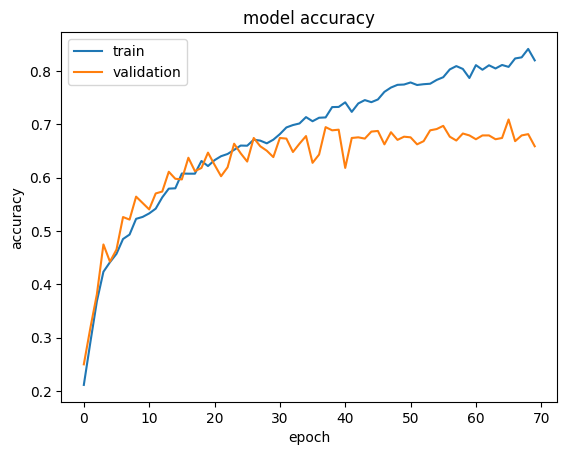

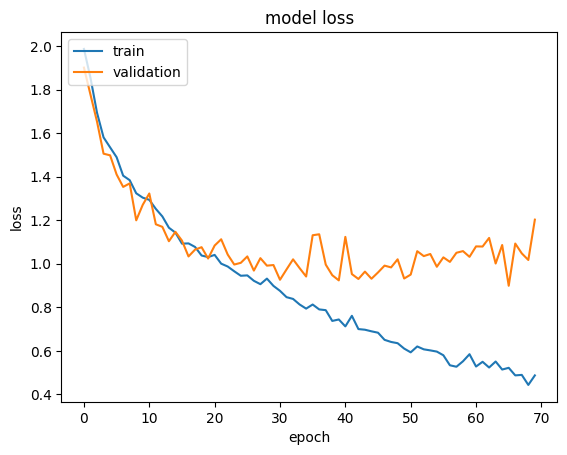

In [90]:
visualize_history(history_vgg16)

### Metrics

In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_test, y_test = next(validation_generator)
y_pred = VGG16_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(np.argmax(y_test, axis=1), y_pred)
print("Classification Report:")
print(classification_rep)

2/2 [==============================] - 1s 275ms/step
Accuracy: 0.75
Confusion Matrix:
[[10  0  0  0  0  0  0  0]
 [ 1  2  1  0  2  1  0  0]
 [ 1  0  6  0  0  0  0  0]
 [ 1  0  0  7  1  0  0  0]
 [ 0  1  0  1 15  1  0  0]
 [ 1  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 0  0  2  0  0  0  0  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.67      0.29      0.40         7
           2       0.67      0.86      0.75         7
           3       0.70      0.78      0.74         9
           4       0.83      0.83      0.83        18
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         1
           7       1.00      0.78      0.88         9

    accuracy                           0.75        64
   macro avg       0.70      0.69      0.68        64
weighted avg       0.75      0.75      0.73        64



## Evaluation


- The accuracy of the VGG16 model is 0.75, which means it correctly classified 75% of the images in the test set.

- The confusion matrix provides a breakdown of the model's predictions for each class. Each row represents the actual class, while each column represents the predicted class. For example, the value at row 1, column 2 indicates that the model predicted 1 sample from class 1 as class 2. The diagonal elements represent correct predictions, while off-diagonal elements represent incorrect predictions.

- The classification report provides precision, recall, and F1-score for each class. A precision of 0.71 for class 0 indicates that 71% of the samples predicted as class 0 were actually correct. The weighted average takes into account the support (number of samples) for each class and provides an overall evaluation of the model's performance.

In summary, the VGG16 model achieved an accuracy of 0.75 on the test set. The confusion matrix helps visualize the model's predictions for each class, and the classification report provides detailed metrics for each class, as well as average metrics across all classes.

## Recommend similar images

In [91]:
def display_images(similar_images):
    num_similar_images = len(similar_images)
    num_output_rows = num_similar_images
    num_output_cols = 1
    row_height = 5
    padding = 0.8

    # Create a figure with a grid for similar images
    fig, axes = plt.subplots(num_output_rows, num_output_cols, figsize=(12, 2 + num_output_rows * row_height))

    # Display the similar images
    for i, (image_path, flower_type, similarity) in enumerate(similar_images):
        img_similar = Image.open(image_path)
        row = i
        axes[row].imshow(img_similar)
        axes[row].set_title(f"Similar Image {i+1}\n{os.path.basename(image_path)}\nFlower Type: {flower_type}\nSimilarity: {similarity:.2f}")
        axes[row].axis('off')

    # Adjust spacing between rows
    fig.subplots_adjust(hspace=padding)

    plt.tight_layout()
    plt.show()

In [104]:
def find_similar_images(model, image_path):
    data_folder = os.path.dirname(os.path.dirname(image_path))
    flower_types = os.listdir(data_folder)
    top_n = 10

    # Load and preprocess the input image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.vgg16.preprocess_input(x)

    # Create a new model that outputs the desired layer's activations
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('flatten_9').output)

    # Extract the feature vector of the input image
    features = intermediate_layer_model.predict(x)

    # Calculate cosine similarities between the input image and all the images in the dataset
    similarities = []
    for i, flower_type in enumerate(flower_types):
        folder_path = os.path.join(data_folder, flower_type)
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.jpg'):
                image_path_i = os.path.join(folder_path, file_name)
                if image_path_i == image_path:
                    continue  # Skip the comparison if the image paths are the same
                img_i = tf.keras.preprocessing.image.load_img(image_path_i, target_size=(256, 256))
                x_i = tf.keras.preprocessing.image.img_to_array(img_i)
                x_i = np.expand_dims(x_i, axis=0)
                x_i = tf.keras.applications.vgg16.preprocess_input(x_i)
                features_i = intermediate_layer_model.predict(x_i)
                similarity = cosine_similarity(features, features_i)[0][0]
                similarities.append((image_path_i, flower_type, similarity))

    # Sort the similarities in descending order and select the top_n images
    similarities = sorted(similarities, key=lambda x: x[2], reverse=True)[:top_n]

    # Display the input image, filename, and flower type
    print("Input Image:", os.path.basename(image_path))

    # Extract the similar images for display
    similar_images = []
    for image_path, flower_type, similarity in similarities:
        similar_images.append((image_path, flower_type, similarity))

    # Call the display_images function to show the input image and similar images
    display_images(similar_images)

# Siamese network

The Siamese Network is a neural network architecture that is designed to learn and compare similarity between pairs of inputs. It was originally introduced for signature verification tasks but has been widely used in various applications, including visually similar image systems. The key idea behind the Siamese Network is to have two identical subnetworks (also called siamese twins) share weights and learn to extract meaningful features from the input data. These features are then used to compute similarity scores or distances between pairs of inputs. The network is trained using pairs of inputs with corresponding labels indicating their similarity or dissimilarity.

In the context of visually similar image systems, the Siamese Network can be used to determine the similarity between images based on their visual content. By training the network on pairs of visually similar and dissimilar images, it learns to extract discriminative features that capture the visual characteristics of the objects in the images. During the inference stage, given a new input image, the Siamese Network can compare it with a set of reference images and compute similarity scores or distances. The similarity scores can then be used to rank the reference images based on their similarity to the query image.

By leveraging the shared weights and learning to compare inputs, the Siamese Network can effectively handle cases where traditional classification or regression approaches may not be sufficient, especially when dealing with tasks that require measuring similarity or dissimilarity between inputs.

**Siamse: Advantages and Disadvantages**

> **Advantages**
1. `Robustness to variations in appearance` : Siamese networks are designed to learn feature representations that are invariant to variations in lighting, scale, rotation, and other image transformations. This makes them suitable for finding visually similar images even when there are slight differences in appearance.

2. `Ability to handle large datasets`: Siamese networks can efficiently handle large datasets by comparing pairs of images rather than computing similarities with all images in the dataset. This reduces the computational complexity and makes it feasible to scale the system to handle a large number of images.

> **Disadvantages**

1. `Training complexity`: Siamese networks require pairs of images with known similarity labels during training. Generating such pairs can be challenging, especially when the dataset is large. It requires careful selection or augmentation of the data to create appropriate positive and negative pairs for training.

2. `Limited to binary similarity`: Siamese networks are typically designed for binary similarity tasks, where the objective is to determine whether two images are similar or dissimilar. They may not be well-suited for tasks that require ranking or clustering images based on similarity.

3. `Sensitivity to hyperparameters`: Siamese networks rely on several hyperparameters, such as learning rate, margin, and network architecture, that need to be carefully tuned for optimal performance. Finding the right set of hyperparameters can be a time-consuming process and may require expertise or extensive experimentation.

The Siamese Network architecture takes advantage of weight sharing, where the same set of weights and biases are used for both branches of the network (siamese twins):

**Siamse: Architecture** 
1. `Input Layer`: This layer represents the input images and defines the shape of the input tensor. In the example, the input shape is (256, 256, 3), indicating images of size 256x256 pixels with 3 color channels (RGB).

2. `Convolutional Layers`: The convolutional layers (conv1 and conv2) apply filters to the input images to extract features. Each convolutional layer consists of convolutional filters that scan the input images, performing element-wise multiplications and summing the results to produce feature maps. The filters capture different patterns and structures in the images. In the example, the first convolutional layer (conv1) has 32 filters, while the second convolutional layer (conv2) has 64 filters. Both layers use a 3x3 filter size and ReLU activation function to introduce non-linearity.

3. `Max Pooling Layers`: The max pooling layers (pool1 and pool2) downsample the feature maps obtained from the convolutional layers. They reduce the spatial dimensions of the feature maps while retaining the most prominent features. Max pooling takes the maximum value within a defined pool size and moves across the feature maps. In the example, max pooling layers with a pool size of (2, 2) are used, which reduces the feature map size by half in each spatial dimension.

4. `Flatten Layer`: The flatten layer converts the 2D feature maps obtained from the previous layers into a 1D vector. It reshapes the feature maps into a flat vector, ensuring compatibility with the fully connected layers that follow.

5. `Fully Connected Layers`: The fully connected layers (fc1 and fc2) perform high-level feature extraction and dimensionality reduction. They connect every neuron from the previous layer to the next layer, enabling information flow and learning of complex relationships in the features. In the example, both fully connected layers have 128 neurons and use ReLU activation functions.

6. `Output Layer`: The output layer (output) produces the final predictions for the classification task. It has 8 neurons, corresponding to the 8 flower types in the example. The activation function used is softmax, which outputs a probability distribution over the flower classes, indicating the likelihood of each class.

<p align="center" width="100%">
  <img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_siamese-network.png" alt="Siamese Architecture"/>
</p>

**Implementation** 
- The input layer takes images with shape (256, 256, 3).
- We have two convolutional layers (conv1 and conv2) with ReLU activation functions and max pooling layers (pool1 and pool2) for feature extraction.
- The feature maps are flattened to a 1D vector using the Flatten layer.
- We have two fully connected layers (fc1 and fc2) with ReLU activation functions for further feature extraction and dimensionality reduction.
- The output layer (output) has a softmax activation function and predicts the probability distribution over the 8 flower types.


In [79]:
def create_siamese_network(input_shape):
    # Define the input layer
    input_layer = Input(shape=input_shape, name='input_image')

    # Convolutional layers
    conv1 = Conv2D(32, (3, 3), activation='relu', name='conv1')(input_layer)
    pool1 = MaxPooling2D(pool_size=(2, 2), name='pool1')(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', name='conv2')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2), name='pool2')(conv2)

    # Flatten the feature maps
    flatten = Flatten(name='flatten')(pool2)

    # Fully connected layers
    fc1 = Dense(128, activation='relu', name='fc1')(flatten)
    fc2 = Dense(128, activation='relu', name='fc2')(fc1)
    output_layer = Dense(8, activation='softmax', name='output')(fc2)  # 8 flower types

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer, name='siamese_network')

    return model

In [80]:
input_shape = (256, 256, 3)
num_classes = 8

Siamese_model = create_siamese_network(input_shape)

In [81]:
Siamese_model.summary()


Model: "siamese_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 254, 254, 32)      896       
                                                                 
 pool1 (MaxPooling2D)        (None, 127, 127, 32)      0         
                                                                 
 conv2 (Conv2D)              (None, 125, 125, 64)      18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 62, 62, 64)        0         
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 fc1 (Dense)                 (None, 128)           

In [82]:
%%time
from keras.optimizers import SGD
loss='sparse_categorical_crossentropy',
optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

Siamese_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

CPU times: total: 0 ns
Wall time: 5.81 ms


In [83]:
history_siamese = train_model(
    70, Siamese_model, train_generator, validation_generator, export_dir="./export", name="Siamese"
)
history_siamese

Epoch 1/70
53/53 [==============================] - 103s 2s/step - loss: 2.9892 - accuracy: 0.2159 - recall_cnn: 0.0198 - precision_cnn: 0.0508 - f1_cnn: 0.0218 - val_loss: 1.9263 - val_accuracy: 0.2596 - val_recall_cnn: 0.0000e+00 - val_precision_cnn: 0.0000e+00 - val_f1_cnn: 0.0000e+00
Epoch 2/70
53/53 [==============================] - 99s 2s/step - loss: 1.8612 - accuracy: 0.2990 - recall_cnn: 0.0236 - precision_cnn: 0.4735 - f1_cnn: 0.0436 - val_loss: 1.8205 - val_accuracy: 0.2967 - val_recall_cnn: 0.0145 - val_precision_cnn: 0.4643 - val_f1_cnn: 0.0280
Epoch 3/70
53/53 [==============================] - 100s 2s/step - loss: 1.7309 - accuracy: 0.3709 - recall_cnn: 0.0631 - precision_cnn: 0.6109 - f1_cnn: 0.1104 - val_loss: 1.7331 - val_accuracy: 0.3421 - val_recall_cnn: 0.0580 - val_precision_cnn: 0.6600 - val_f1_cnn: 0.1028
Epoch 4/70
53/53 [==============================] - 89s 2s/step - loss: 1.6780 - accuracy: 0.3956 - recall_cnn: 0.1005 - precision_cnn: 0.6289 - f1_cnn: 0.165

53/53 [==============================] - 99s 2s/step - loss: 1.2189 - accuracy: 0.5587 - recall_cnn: 0.3729 - precision_cnn: 0.7205 - f1_cnn: 0.4892 - val_loss: 1.2657 - val_accuracy: 0.5443 - val_recall_cnn: 0.3605 - val_precision_cnn: 0.6458 - val_f1_cnn: 0.4614
Epoch 31/70
53/53 [==============================] - 99s 2s/step - loss: 1.1674 - accuracy: 0.5823 - recall_cnn: 0.4050 - precision_cnn: 0.7251 - f1_cnn: 0.5175 - val_loss: 1.2141 - val_accuracy: 0.5550 - val_recall_cnn: 0.3906 - val_precision_cnn: 0.7364 - val_f1_cnn: 0.5093
Epoch 32/70
53/53 [==============================] - 99s 2s/step - loss: 1.1803 - accuracy: 0.5757 - recall_cnn: 0.3930 - precision_cnn: 0.7125 - f1_cnn: 0.5043 - val_loss: 1.2161 - val_accuracy: 0.5622 - val_recall_cnn: 0.3571 - val_precision_cnn: 0.7496 - val_f1_cnn: 0.4833
Epoch 33/70
53/53 [==============================] - 100s 2s/step - loss: 1.1699 - accuracy: 0.5772 - recall_cnn: 0.3972 - precision_cnn: 0.7144 - f1_cnn: 0.5088 - val_loss: 1.2151 

Epoch 60/70
53/53 [==============================] - 99s 2s/step - loss: 0.9658 - accuracy: 0.6470 - recall_cnn: 0.5273 - precision_cnn: 0.7516 - f1_cnn: 0.6186 - val_loss: 1.1235 - val_accuracy: 0.6029 - val_recall_cnn: 0.4955 - val_precision_cnn: 0.6807 - val_f1_cnn: 0.5717
Epoch 61/70
53/53 [==============================] - 99s 2s/step - loss: 0.9440 - accuracy: 0.6583 - recall_cnn: 0.5463 - precision_cnn: 0.7636 - f1_cnn: 0.6359 - val_loss: 1.2274 - val_accuracy: 0.5730 - val_recall_cnn: 0.4978 - val_precision_cnn: 0.7044 - val_f1_cnn: 0.5796
Epoch 62/70
53/53 [==============================] - 98s 2s/step - loss: 0.9686 - accuracy: 0.6473 - recall_cnn: 0.5215 - precision_cnn: 0.7568 - f1_cnn: 0.6162 - val_loss: 1.2276 - val_accuracy: 0.5813 - val_recall_cnn: 0.4799 - val_precision_cnn: 0.6550 - val_f1_cnn: 0.5527
Epoch 63/70
53/53 [==============================] - 99s 2s/step - loss: 0.9510 - accuracy: 0.6571 - recall_cnn: 0.5451 - precision_cnn: 0.7516 - f1_cnn: 0.6305 - val_lo

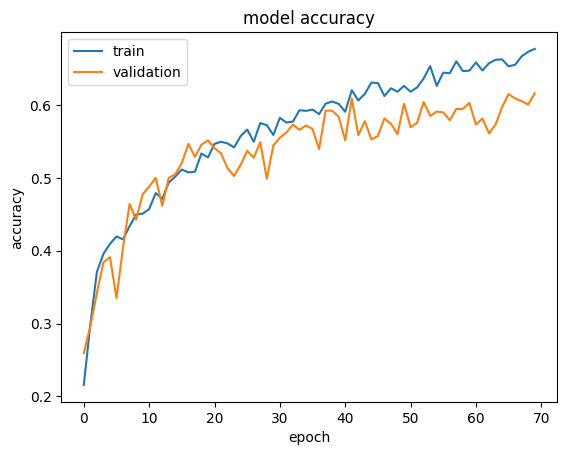

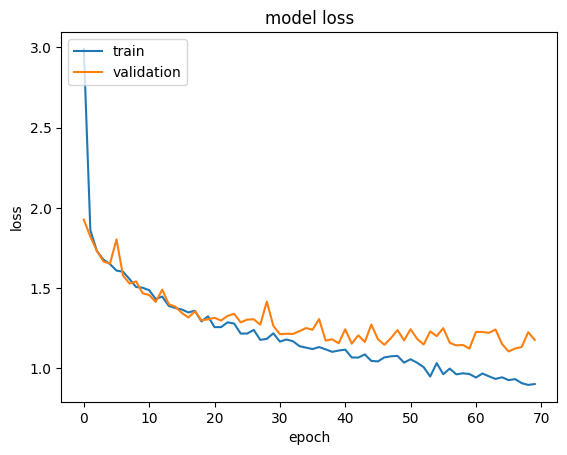

In [84]:
visualize_history(history_siamese)

### Metrics

In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_test, y_test = next(validation_generator)
y_pred = Siamese_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(np.argmax(y_test, axis=1), y_pred)
print("Classification Report:")
print(classification_rep)

2/2 [==============================] - 0s 168ms/step
Accuracy: 0.671875
Confusion Matrix:
[[11  0  0  3  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 1  0  4  0  2  0  0  2]
 [ 2  0  0  8  0  0  0  0]
 [ 1  0  0  2 10  0  0  0]
 [ 1  1  0  0  1  3  0  1]
 [ 0  1  0  0  1  0  1  0]
 [ 0  0  0  0  0  0  0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.00      0.00      0.00         2
           2       1.00      0.44      0.62         9
           3       0.62      0.80      0.70        10
           4       0.62      0.77      0.69        13
           5       1.00      0.43      0.60         7
           6       1.00      0.33      0.50         3
           7       0.67      1.00      0.80         6

    accuracy                           0.67        64
   macro avg       0.70      0.57      0.58        64
weighted avg       0.73      0.67      0.66        64



## Evaluation

-  `Accuracy`: The Siamese network achieved an accuracy of 0.671875, which means that approximately 67% of the samples were classified correctly.

- `Confusion Matrix`: In the first row, there were 11 samples from class 0 that were correctly classified, and 3 samples were misclassified as class 3.

- `Classification Report`: The classification report presents additional evaluation metrics such as precision, recall, and F1-score for each class. Precision measures the accuracy of the positive predictions for a class, recall represents the proportion of actual positives that were correctly identified, and the F1-score is the harmonic mean of precision and recall. The support column indicates the number of samples in each class.

The report shows that the model performed better in some classes than others. For instance, class 2 achieved a precision of 1.0, meaning all positive predictions for that class were correct. However, class 1 had a precision and recall of 0, indicating that the model didn't correctly identify any samples from that class. The accuracy, precision, recall, and F1-score values in the "weighted avg" row are calculated by considering the class imbalance, providing an overall assessment of the model's performance.

Overall, the Siamese network achieved an accuracy of 67%, but its performance varied across different classes, with some classes having higher precision, recall, and F1-scores than others.

### Compare Metrics

In [136]:
def plot_model_comparison(first_model, second_model):
    plt.plot(first_model.history['accuracy'], label='VGG Training Accuracy')
    plt.plot(first_model.history['val_accuracy'], label='VGG Validation Accuracy')
    plt.plot(second_model.history['accuracy'], label='Siamese Training Accuracy')
    plt.plot(second_model.history['val_accuracy'], label='Siamese Validation Accuracy')
    plt.title('VGG vs Siamese: Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

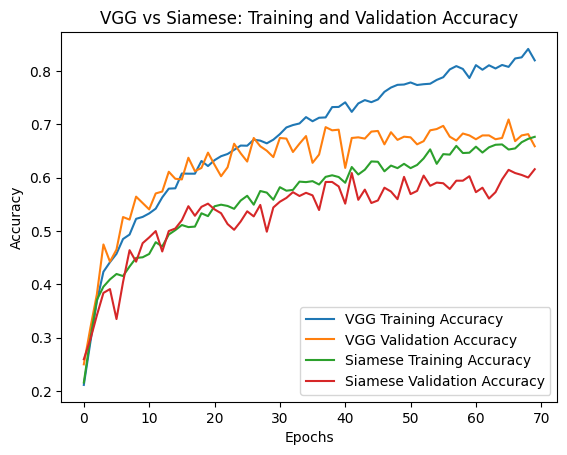

In [137]:
plot_model_comparison(history_vgg16, history_siamese)

When comparing the accuracy of the VGG16 model and the Siamese model, it is evident that the VGG16 model outperforms the Siamese model. The VGG16 model achieves an accuracy of 0.8202 during training and 0.6591 during validation, whereas the Siamese model achieves an accuracy of 0.6768 during training and 0.6160 during validation.

In conclusion, the VGG16 model outperforms the Siamese model in terms of precision, making it the best candidate for the flower recommendation assignment.

### Save model

In [110]:
import joblib
joblib.dump(VGG16_model, 'VGG16_model.joblib')

['VGG16_model.joblib']